# Picks the sample for the IGRINS proposal.
Michael Gully-Santiago  
January-February 2016

### <i class="fa fa-arrow-right fa-1x"></i>   Input:

<i class="fa fa-table fa-2x"></i> 1658 <i class="fa fa-times fa-1x"></i> 60  
<i class="fa fa-file-text fa-2x"></i>
`../analysis/K2C02_YSO_sim_WISE.csv`  

### Output <i class="fa fa-arrow-right fa-1x"></i>   :

<i class="fa fa-list fa-2x"></i> Target list  
<i class="fa fa-bar-chart fa-2x"></i> `K2_selection.pdf`

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%config InlineBackend.figure_format = 'retina' 
import warnings

### Read in the K2c02 data crossmatched with kplr

In [2]:
k2_simbad = pd.read_csv('../analysis/K2C02_YSO_sim_WISE.csv')

In [3]:
candidates = ['203516237', '203642381', '203731383', '203793391', '203826403',
       '203801323', '203810698']

# Selection criteria

Main goals:
1. Observable
2. Has sunspots
3. No disk

Selection criteria:
1. H < 10.5
2. K < 10.5
3. Above average level of activity
4. Periodic variability (i.e., not purely stochastic)
5. M or K spectral type
6. Oph or Upper sco.
7. Previously identified as T-Tauri star

In [4]:
tdf = k2_simbad

In [5]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    tdf['Object Type'] = 'Other'
    
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    tdf['Object Type'][tdf.OTYPE != tdf.OTYPE] = 'Unknown'
    
    yso = ((tdf.OTYPE == 'TTau*') | (tdf.OTYPE == 'pMS*') | (tdf.OTYPE == '*inAssoc') |
           (tdf.OTYPE == '*inCl') | (tdf.OTYPE == 'Ae*') | (tdf.OTYPE == 'YSO') )
           
    var_star = ((tdf.OTYPE == 'V*') | (tdf.OTYPE == 'RotV*') |
                (tdf.OTYPE == 'Orion_V*') | (tdf.OTYPE == 'PulsV*delSct') |
                (tdf.OTYPE == 'RSCVn') | (tdf.OTYPE == 'EB*Algol') |
                (tdf.OTYPE == 'Cepheid') | (tdf.OTYPE == 'RotV*alf2CVn') )
    
    tdf['Object Type'][yso] = 'Young Star'
    tdf['Object Type'][var_star] = 'Variable Star'

In [6]:
yso.sum()

435

In [7]:
cands = tdf.index[yso].values

In [8]:
cands = ((tdf['logiqr'] > -0.8) &
      (tdf['logiqr'] < -0.3) &
      (tdf['logstd'] < (tdf.logiqr + np.log10(0.50) +0.15)) &
      (tdf.SP_TYPE.str.contains('M')) &
      (tdf.hmag < 11.0) &
      (tdf.kmag < 11.0) )

In [9]:
vals = cands==True
vals.sum()

9

In [10]:
#for el in tdf.SP_TYPE[gi]:
#    print(el[2:-1])

In [11]:
from bokeh.io import output_notebook
output_notebook()

Loading BokehJS ...

## Selection figure

In [12]:
cmap=sns.light_palette('red', as_cmap=True)

In [13]:
df = tdf

In [14]:
tdf.columns

Index(['EPIC_ID', 'count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max',
       'logstd', 'logiqr', 'fname', 'input_id', 'id', 'k2_ra', 'k2_dec',
       'twomass', 'ucac', 'tyc', 'hip', 'kp', 'bmag', 'vmag', 'rmag', 'imag',
       'jmag', 'hmag', 'kmag', 'kepflag', 'sim_2MASS', 'MAIN_ID', 'RA', 'DEC',
       'RA_PREC', 'DEC_PREC', 'COO_ERR_MAJA', 'COO_ERR_MINA', 'COO_ERR_ANGLE',
       'COO_QUAL', 'COO_WAVELENGTH', 'COO_BIBCODE', 'OTYPE', 'ID', 'SP_TYPE',
       'SP_QUAL', 'SP_BIBCODE', 'FLUX_V', 'FLUX_I', 'FLUX_H', 'FLUX_K',
       'INPUT', 'AllWISE', 'W1mag', 'e_W1mag', 'W2mag', 'e_W2mag', 'W3mag',
       'e_W3mag', 'W4mag', 'e_W4mag', 'Object Type'],
      dtype='object')

In [15]:
third_dim = df.W1mag-df.W3mag
wi = (third_dim == third_dim)

In [16]:
gi = ((tdf['logiqr'] > -1.0) &
      (tdf['logiqr'] < -0.3) &
      (third_dim == third_dim) &
      (third_dim < 0.9) )

In [17]:
#gi = ((third_dim == third_dim) &
#      (third_dim < 0.9) )

In [18]:
gi = third_dim == third_dim

In [19]:
gi.sum()

425

In [20]:
#final_list = [204876697,203785905,203908611,204264641,204566404,205034491,205154017,205164400,205483258]
final_list = [204876697,203785905,203908611,204264641,204566404,205034491,205154017,205164400
              ,205483258,203440253,203710077,204330922,204519031,204895521,205117205]
wi=df.EPIC_ID.isin(final_list)

In [21]:
#gi = ((df.logiqr < -1.7) & yso &
#      (df.logiqr > -2.0) &
#      (df.hmag < 10.5) & 
#      (df.kmag < 10.5) &
#      (third_dim < 0.9))
#wi = gi


In [22]:
sns.set_context('paper', font_scale=2.0)
sns.set_style('ticks')

//anaconda/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


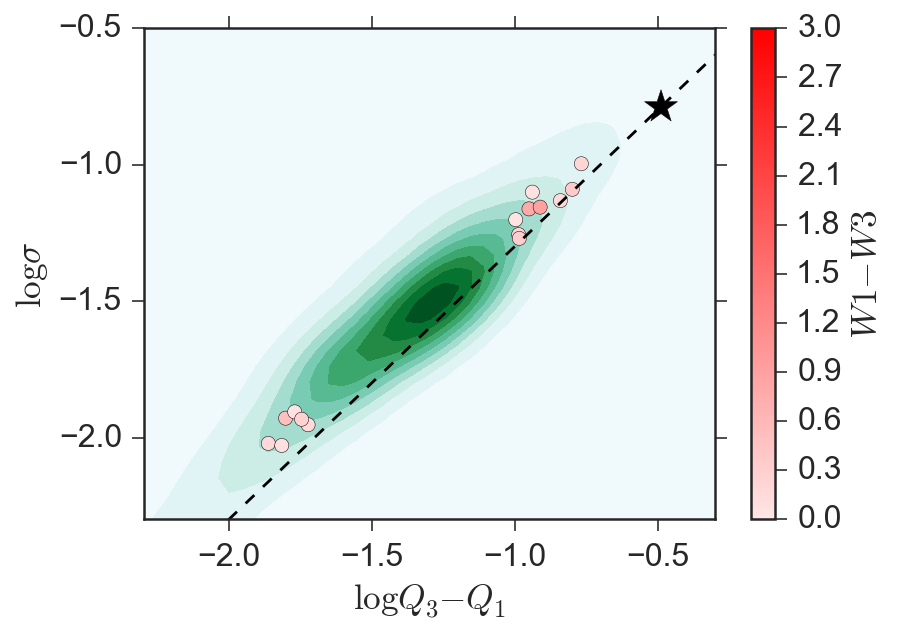

In [23]:

sns.kdeplot(df.logiqr, df.logstd, shade=True)

#sc = plt.scatter(df['logiqr'][gi], df['logstd'][gi],c='k', marker='s', alpha=1.0)

sc = plt.scatter(df['logiqr'][wi], df['logstd'][wi], c=third_dim[wi],
                 vmin=0, vmax=3, s=50, cmap=cmap, alpha=1.0)
plt.colorbar(sc, label='$W1-W3$')
plt.xlabel('$\log{Q_{3}-Q_{1}}$')
plt.ylabel('$\log{\sigma}$')
#plt.title('K2 Cycle 02 YSO candidates')
plt.xlim(-2.3, -0.3)
plt.ylim(-2.3, -0.5)

math_x = np.linspace(-4, 0.5, num=50)
math_y = math_x + np.log10(0.5035)
plt.plot(math_x, math_y, 'k--')
plt.scatter([-0.489], [-0.787], s=300, marker='*', c='k')
plt.savefig('/Users/gully/GitHub/IGRINSdata/proposal/tri2_2016/figures/K2_selection.pdf', bbox_inches='tight')

## *Update* May 26, 2016
We need brighter targets for IGRINS, since the 10.5 mag limit was based on optimisitic weather conditions.  
We will update the selection criteria to select for bright sources.

//anaconda/lib/python3.4/site-packages/numpy/lib/function_base.py:564: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  n = np.zeros(bins, ntype)
//anaconda/lib/python3.4/site-packages/numpy/lib/function_base.py:600: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  n += np.bincount(indices, weights=tmp_w, minlength=bins).astype(ntype)
//anaconda/lib/python3.4/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


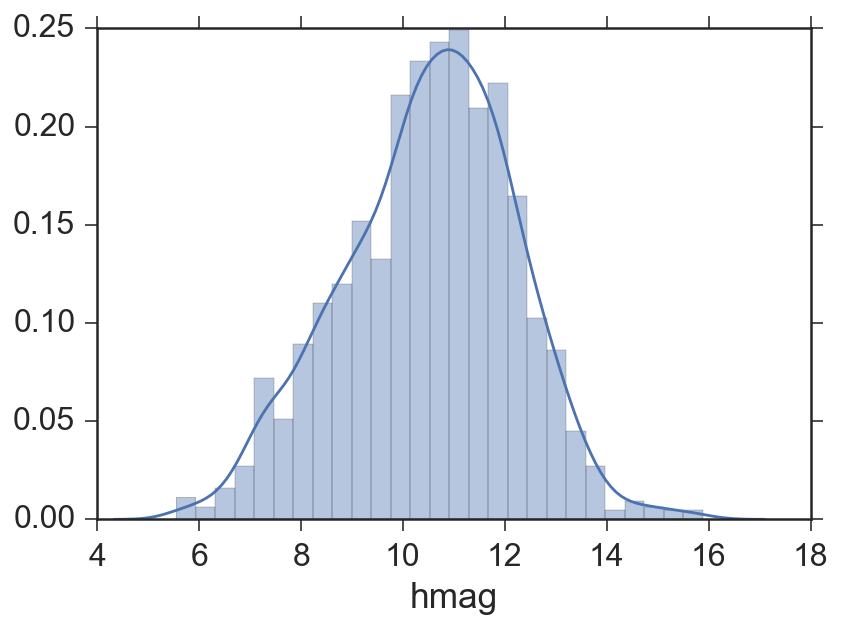

In [24]:
sns.distplot(df.hmag[df.hmag == df.hmag])

In [25]:
gi = ((third_dim == third_dim) &
      (third_dim < 0.9) &
      (df.hmag < 8.5))

In [26]:
gi.sum()

22

In [27]:
wi = gi

//anaconda/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


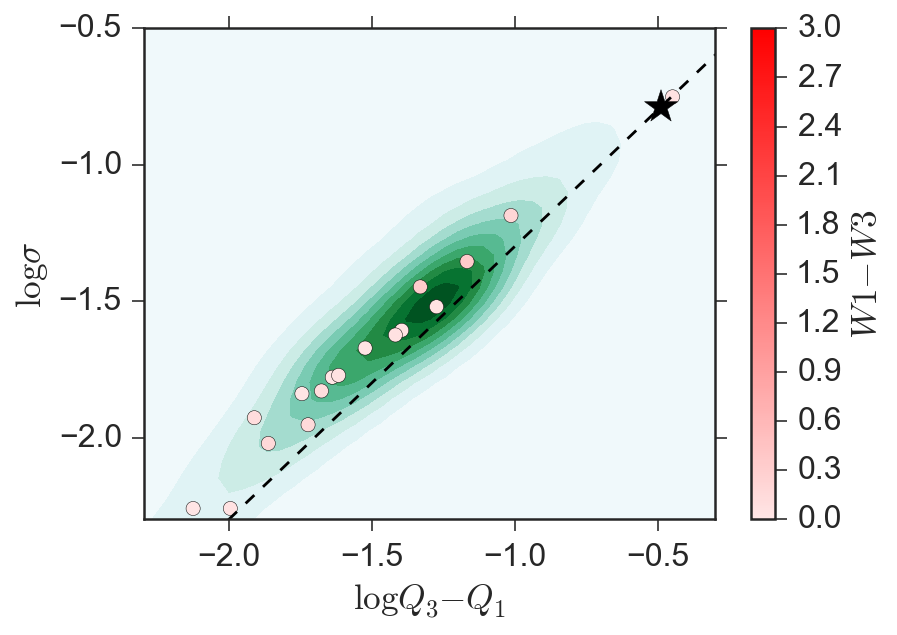

In [28]:
sns.kdeplot(df.logiqr, df.logstd, shade=True)

#sc = plt.scatter(df['logiqr'][gi], df['logstd'][gi],c='k', marker='s', alpha=1.0)

sc = plt.scatter(df['logiqr'][wi], df['logstd'][wi], c=third_dim[wi],
                 vmin=0, vmax=3, s=50, cmap=cmap, alpha=1.0)
plt.colorbar(sc, label='$W1-W3$')
plt.xlabel('$\log{Q_{3}-Q_{1}}$')
plt.ylabel('$\log{\sigma}$')
#plt.title('K2 Cycle 02 YSO candidates')
plt.xlim(-2.3, -0.3)
plt.ylim(-2.3, -0.5)

math_x = np.linspace(-4, 0.5, num=50)
math_y = math_x + np.log10(0.5035)
plt.plot(math_x, math_y, 'k--')
plt.scatter([-0.489], [-0.787], s=300, marker='*', c='k')

In [29]:
tdf.columns

Index(['EPIC_ID', 'count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max',
       'logstd', 'logiqr', 'fname', 'input_id', 'id', 'k2_ra', 'k2_dec',
       'twomass', 'ucac', 'tyc', 'hip', 'kp', 'bmag', 'vmag', 'rmag', 'imag',
       'jmag', 'hmag', 'kmag', 'kepflag', 'sim_2MASS', 'MAIN_ID', 'RA', 'DEC',
       'RA_PREC', 'DEC_PREC', 'COO_ERR_MAJA', 'COO_ERR_MINA', 'COO_ERR_ANGLE',
       'COO_QUAL', 'COO_WAVELENGTH', 'COO_BIBCODE', 'OTYPE', 'ID', 'SP_TYPE',
       'SP_QUAL', 'SP_BIBCODE', 'FLUX_V', 'FLUX_I', 'FLUX_H', 'FLUX_K',
       'INPUT', 'AllWISE', 'W1mag', 'e_W1mag', 'W2mag', 'e_W2mag', 'W3mag',
       'e_W3mag', 'W4mag', 'e_W4mag', 'Object Type'],
      dtype='object')

In [30]:
tdf[['EPIC_ID', 'sim_2MASS', 'RA', 'DEC', 'logiqr', 'hmag', 'OTYPE', 'SP_TYPE']][gi].sort_values(by='logiqr', ascending=False)

,EPIC_ID,sim_2MASS,RA,DEC,logiqr,hmag,OTYPE,SP_TYPE
1399,204947015,2MASS J16015822-2008121,16 01 58.2248,-20 08 11.995,-0.448981,7.808,TTau*,b'G9IV(e)'
1369,204894575,2MASS J16025396-2022480,16 02 53.960,-20 22 48.06,-1.014527,8.465,TTau*,b'K7'
987,204264833,2MASS J16230783-2300596,16 23 07.835,-23 00 59.67,-1.168295,8.343,TTau*,b'K5'
854,204101029,2MASS J16161795-2339476,16 16 17.952,-23 39 47.68,-1.275134,8.236,TTau*,b'G9IV'
689,203916376,2MASS J16274987-2425402,16 27 49.87,-24 25 40.2,-1.331962,8.118,TTau*,b'A7'
225,203468205,2MASS J16084340-2602168,16 08 43.407,-26 02 16.84,-1.397016,8.050,TTau*,b'G9V(e)'
1429,205008763,2MASS J15570234-1950419,15 57 02.340,-19 50 41.98,-1.419139,8.488,TTau*,b'K7'
829,204069863,2MASS J15545986-2347181,15 54 59.8676,-23 47 18.160,-1.524931,7.182,TTau*,b'G3V'
889,204147776,2MASS J15581270-2328364,15 58 12.7047,-23 28 36.502,-1.618021,8.124,pMS*,b'G9V'
672,203911473,2MASS J16251923-2426526,16 25 19.2438,-24 26 52.678,-1.640054,7.982,TTau*,b'G9V'


In [31]:
from bokeh.plotting import figure, show, output_file, vplot

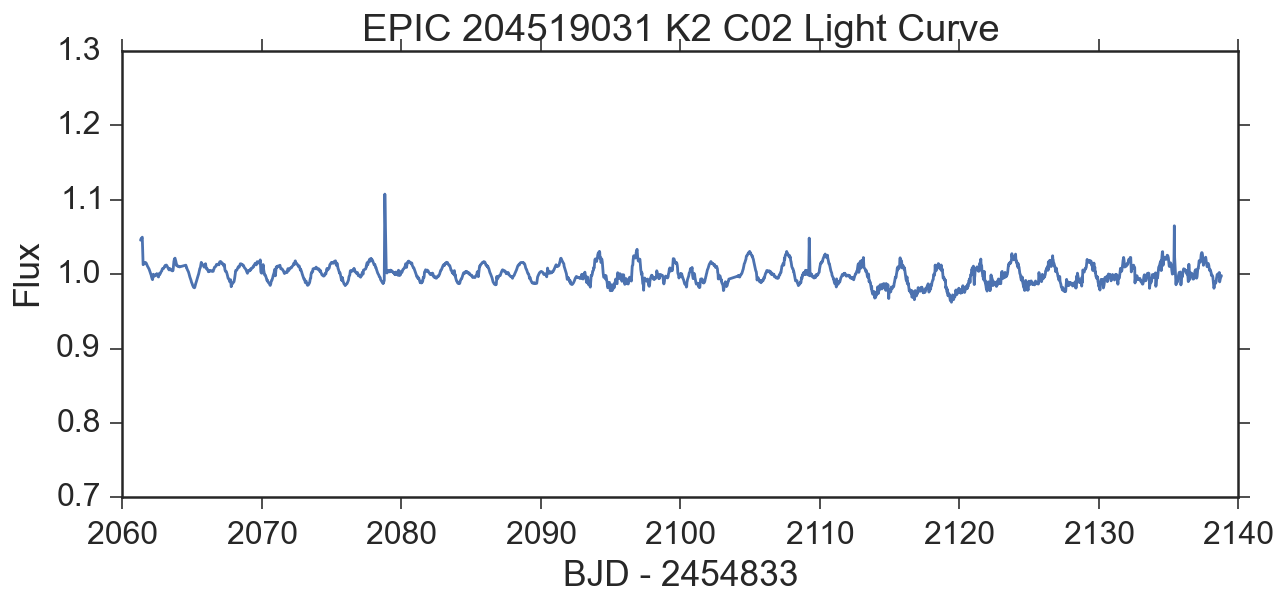

In [42]:
this_cand = 204519031

ii = tdf.index[tdf.EPIC_ID == this_cand].values[0]

plt.figure(figsize=(10, 4))
file = tdf.fname[ii]
raw_lc = pd.read_csv(file, index_col=False)

plt.plot(raw_lc['BJD - 2454833'], raw_lc[' Corrected Flux'])
plt.ylim(0.7, 1.3)
#plt.ylim(0.99, 1.01)
#plt.ylim(0.8, 1.2)
plt.title("EPIC {} K2 C02 Light Curve".format(tdf.EPIC_ID[ii]))
plt.xlabel('BJD - 2454833')
plt.ylabel('Flux');

# Determine the periods of the sources.

In [76]:
p1 = figure()
p1.plot_width=900
p1.title = "K2 Cycle 2 Young Star Candidates"
p1.grid.grid_line_alpha=0.3
p1.xaxis.axis_label = 'BJD - 2454833'
p1.yaxis.axis_label = 'Corrected Flux'

p1.line(raw_lc['BJD - 2454833'], raw_lc[' Corrected Flux'], color='#EF0E03')

show(p1)  # open a browser

In [1]:
10**-1.3

0.05011872336272722

In [247]:
vals = (tdf.logiqr < -1.7) & (third_dim < 0.9)

In [5]:
1000*20*2/3.0

13333.333333333334

In [8]:
np.radians(180)

3.1415926535897931

In [10]:
1.0/np.sin(np.radians(30.0))

2.0000000000000004

In [55]:
tdf.EPIC_ID[gi]

189     203394211
213     203440253
238     203499724
291     203655051
310     203709312
311     203710077
875     204130665
1002    204279085
1007    204282976
1043    204330922
1203    204519031
1338    204845955
1372    204895521
1393    204932100
1402    204954915
1421    205000676
1451    205040772
1456    205047378
1501    205117205
1573    205217412
Name: EPIC_ID, dtype: int64

In [40]:
vec = third_dim[wi]

In [42]:
vals = vec != vec

(array([   1.,    0.,    0.,    0.,    0.,    1.,    4.,    7.,   65.,
         105.,   46.,   36.,   11.,    6.,    9.,    7.,   21.,   18.,
          20.,   23.,   17.,    3.,    4.,    9.,    3.,    2.,    1.,
           1.,    0.,    0.,    2.,    0.,    0.,    1.,    1.,    0.,
           0.,    0.,    0.,    1.]),
 array([-1.85400009, -1.6306251 , -1.4072501 , -1.1838751 , -0.96050011,
        -0.73712511, -0.51375012, -0.29037512, -0.06700013,  0.15637487,
         0.37974986,  0.60312486,  0.82649986,  1.04987485,  1.27324985,
         1.49662484,  1.71999984,  1.94337483,  2.16674983,  2.39012482,
         2.61349982,  2.83687482,  3.06024981,  3.28362481,  3.5069998 ,
         3.7303748 ,  3.95374979,  4.17712479,  4.40049978,  4.62387478,
         4.84724978,  5.07062477,  5.29399977,  5.51737476,  5.74074976,
         5.96412475,  6.18749975,  6.41087475,  6.63424974,  6.85762474,
         7.08099973]),
 <a list of 40 Patch objects>)

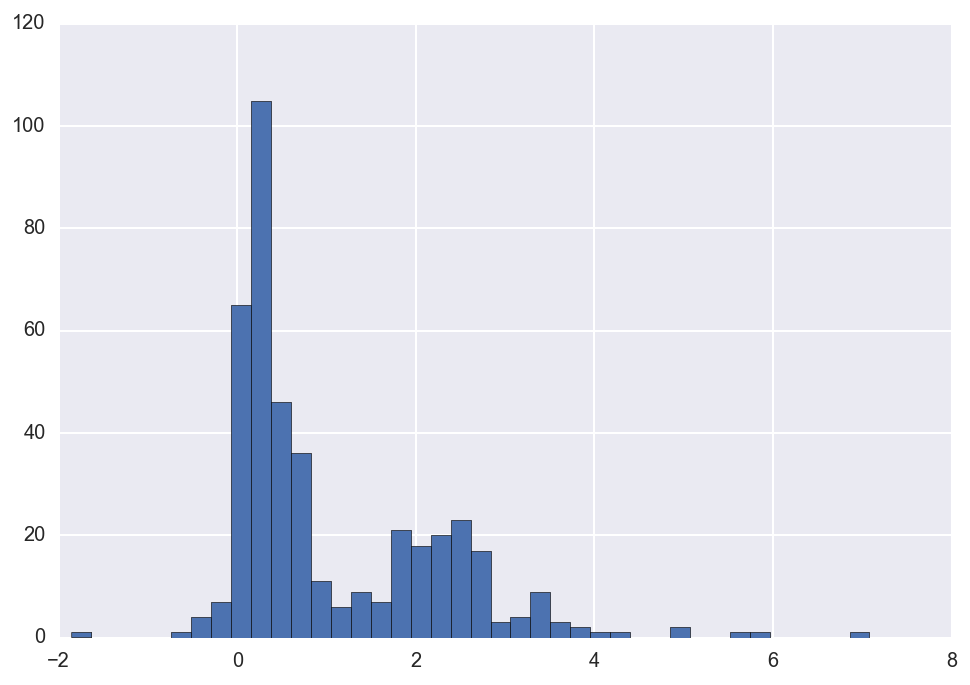

In [50]:
plt.hist(vec.values, bins=40)